Howto Tune Cascade Classifier 
---

(https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html#cascadeclassifier-detectmultiscale)


detectMultiscale(input image Scale Factor ,Min Neighbors)
---

Scale factor- Parameter specifying how much the image size is reduced at each image scale

Min Neighbors -Parameter specifying how many neighbors each candidate rectangle should have to retain it




FACE DETECTION
-------

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Create Classifier

In [2]:
face_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

### Open Image

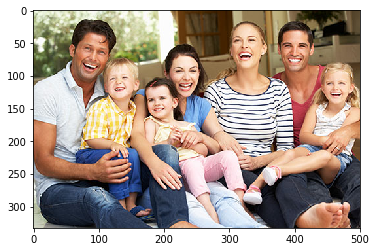

In [16]:
image =cv2.imread('Images/eye_face6.jpg')
fix_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

### Detect Faces

In [17]:
faces =face_classifier.detectMultiScale(image ,1.3,5)

### No Faces Detected

In [18]:
if faces is():
    print('No Faces found')

### It's a kind of Magic

In [19]:
def detect_faces(fix_img):
    face_rects=face_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (0,255,0),
                     (3))
        
    return fix_img    

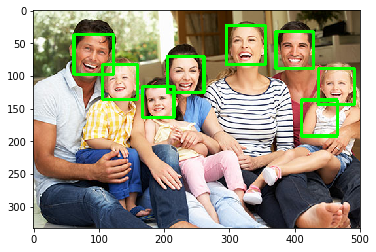

In [20]:
result =detect_faces(fix_img)
plt.imshow(result)

EYE DETECTION
--

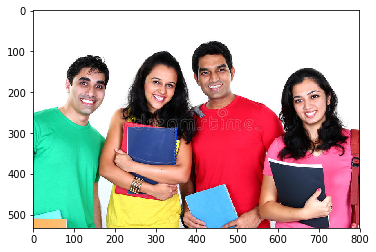

In [25]:
image =cv2.imread('Images/eye.jpg')
fix_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

In [26]:
eye_classifier=cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [27]:
def detect_eye(fix_img):
    eye_rects=eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (255,255,255),
                     (3))
        
    return fix_img    

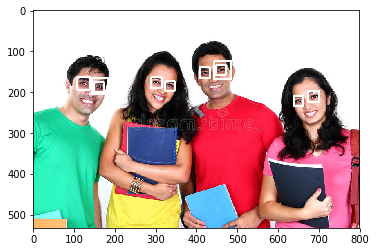

In [28]:
result =detect_eye(fix_img)
plt.imshow(result)

EYE AND FACE DETECTION
---

In [32]:
def detect_faces_eyes(fix_img):
    face_rects=face_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (0,255,0),
                     7)
    eye_rects=eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,
                     (x,y),
                     (x+w,y+h),
                     (255,255,255),
                     5)
        
    return fix_img    

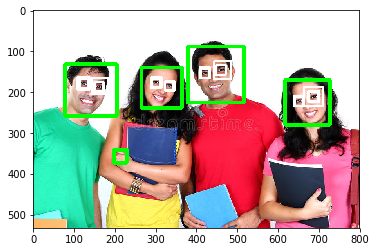

In [34]:
result =detect_faces_eyes(fix_img)
plt.imshow(result)

PEDESTRIAN DETECTION
---

In [35]:
body_classifier =cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

In [36]:
cap =cv2.VideoCapture('Video/People_Walking.mp4')

In [37]:
#While Loop
while cap.isOpened():
    
    #Read the Capture
    ret ,frame =cap.read()
    
    #Pass the Frame to the Classifier
    bodies =body_classifier.detectMultiScale(frame,1.2,3)
    
    #if Statement
    if ret==True:
        
          #Bound Boxes to Identified Bodies 
        for(x,y,w,h) in bodies:
            cv2.rectangle(frame,(x,y),(x+w ,y+h),(25,125,255),5)
            cv2.imshow('Pedestrians',frame)
        
          #Exit with Esc button
        if cv2.waitKey(1)==27:
            break
            
     #else 
    else:
        break
#Release the capture & destroy all windows    

cap.release()
cv2.destroyAllWindows()
    